In [1]:
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [19]:
card_202007 = pd.read_csv("../card_data/csv/202007.csv")
card_202007

,이용일,결제일,금액,포인트리금액,대분류,중분류,소분류
0,20200701,NaN,1900,19.0,식사,카페,카페7그램
1,20200701,NaN,18100,NaN,생활,편의점,GS25
2,20200701,NaN,-905,NaN,기타,할인,NaN
3,20200702,NaN,20700,NaN,식사,햄버거,롯데리아
4,20200703,NaN,-645,NaN,기타,할인,NaN
...,...,...,...,...,...,...,...
73,20200730,NaN,18000,NaN,식사,한식,NaN
74,20200730,NaN,5500,NaN,식사,카페,바나프레소
75,20200731,20200805.0,62000,NaN,교통,버스 23,NaN
76,20200731,NaN,1500,15.0,식사,카페,카페7그램


In [20]:
card_202007 = card_20207[["이용일", "금액", "대분류", "중분류", "소분류"]]
card_202007

,이용일,금액,대분류,중분류,소분류
0,20200701,1900,식사,카페,카페7그램
1,20200701,18100,생활,편의점,GS25
2,20200701,-905,기타,할인,NaN
3,20200702,20700,식사,햄버거,롯데리아
4,20200703,-645,기타,할인,NaN
...,...,...,...,...,...
73,20200730,18000,식사,한식,NaN
74,20200730,5500,식사,카페,바나프레소
75,20200731,62000,교통,버스,NaN
76,20200731,1500,식사,카페,카페7그램


In [21]:
# 대분류 몇개?
card_202007["대분류"].value_counts()
# series타입

대분류
식사    45
생활    20
기타     6
유흥     3
교통     2
문화     1
통신     1
Name: count, dtype: int64

In [22]:
card_202007.groupby("대분류").count()
# dataFrame 타입

,이용일,금액,중분류,소분류
대분류,,,,
교통,2,2,2,0
기타,6,6,6,0
문화,1,1,1,1
생활,20,20,20,20
식사,45,45,45,28
유흥,3,3,3,0
통신,1,1,0,0


In [23]:
# 대분류, 중분류 몇개?
card_202007[["대분류", "중분류"]].value_counts()
# 시리즈 타입은 좋은데 보기 너무 힘들다..

대분류  중분류
식사   카페     25
생활   편의점    18
기타   할인      6
식사   한식      5
     분식      4
     디저트     3
     중식      3
     햄버거     3
유흥   술       3
교통   버스      2
문화   도서      1
생활   마트      1
     오피스     1
식사   돈까스     1
     순대      1
Name: count, dtype: int64

In [24]:
card_202007.groupby(["대분류","중분류"]).count()
# 데이터프레임 타입으로 만드니까 너무 이쁘다아~

이용일  금액  소분류
대분류 중분류              
교통  버스     2   2    0
기타  할인     6   6    0
문화  도서     1   1    1
생활  마트     1   1    1
    오피스    1   1    1
    편의점   18  18   18
식사  돈까스    1   1    0
    디저트    3   3    0
    분식     4   4    0
    순대     1   1    0
    중식     3   3    0
    카페    25  25   25
    한식     5   5    0
    햄버거    3   3    3
유흥  술      3   3    0

In [25]:
# 버스 뒤의 숫자 자르기
card_202007["중분류"].str.split(" ").str.get(0)
# card_202007["중분류"] = series(시리즈)
# 일단 중분류 스트링(values)을 가져오고 하나하나 잘라줘  split(" ") 공백으로 잘라줘
# .str.get(0) 으로 잘라준 스트링의 0번지 값을 가져와줘  => 버스 22를 '버스','22' 라고 치환하고 0번지인 버스만 가져온다.
# 스플릿 한 결과는 시리즈 왜냐하면 str 하나하나가 시리즈로 반환되니까 다시 시리즈로 만들어줬다.
# 시리즈에서 문자열 하나하나 가져와서 0번지에 있는 값을 가져와주세요 라고 하면 '버스'가 가져와지고 시리즈->문자열->시리즈로 반환 되는 것
# str = Vectorized string functions for Series and Index.
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html

0      카페
1     편의점
2      할인
3     햄버거
4      할인
     ... 
73     한식
74     카페
75     버스
76     카페
77      술
Name: 중분류, Length: 78, dtype: object

In [26]:
type(card_202007["중분류"].str.split(" "))

pandas.core.series.Series

In [27]:
card_202007["중분류"] = card_202007["중분류"].str.split(" ").str.get(0)
# 너 이렇게 하면 원본이 바뀔텐데 괜찮아? 차라리 카피하는거 어때 라는 안내문구가 뜬다.
# 실행하고 card_20207.groupby(["대분류","중분류"]).count()를 다시 실행시키면 버스 2가 된 것을 확인할 수 있다.

In [28]:
card_202007.dtypes

이용일     int64
금액      int64
대분류    object
중분류    object
소분류    object
dtype: object

In [29]:
# 이용일의 타입을 날짜로 바꾸자
pd.to_datetime(card_202007["이용일"])
#음... 이게뭐지

0    1970-01-01 00:00:00.020200701
1    1970-01-01 00:00:00.020200701
2    1970-01-01 00:00:00.020200701
3    1970-01-01 00:00:00.020200702
4    1970-01-01 00:00:00.020200703
                  ...             
73   1970-01-01 00:00:00.020200730
74   1970-01-01 00:00:00.020200730
75   1970-01-01 00:00:00.020200731
76   1970-01-01 00:00:00.020200731
77   1970-01-01 00:00:00.020200731
Name: 이용일, Length: 78, dtype: datetime64[ns]

In [30]:
card_202007["이용일"].astype("str")

0     20200701
1     20200701
2     20200701
3     20200702
4     20200703
        ...   
73    20200730
74    20200730
75    20200731
76    20200731
77    20200731
Name: 이용일, Length: 78, dtype: object

In [31]:
# 숫자를 바로 날짜로 바꾸면 안된다.
#  숫자 -> 문자 -> 날짜
pd.to_datetime(card_202007["이용일"].astype("str"))

0    2020-07-01
1    2020-07-01
2    2020-07-01
3    2020-07-02
4    2020-07-03
        ...    
73   2020-07-30
74   2020-07-30
75   2020-07-31
76   2020-07-31
77   2020-07-31
Name: 이용일, Length: 78, dtype: datetime64[ns]

In [32]:
card_202007["이용일"] = pd.to_datetime(card_202007["이용일"].astype("str"))
card_202007
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

,이용일,금액,대분류,중분류,소분류
0,2020-07-01,1900,식사,카페,카페7그램
1,2020-07-01,18100,생활,편의점,GS25
2,2020-07-01,-905,기타,할인,NaN
3,2020-07-02,20700,식사,햄버거,롯데리아
4,2020-07-03,-645,기타,할인,NaN
...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN
74,2020-07-30,5500,식사,카페,바나프레소
75,2020-07-31,62000,교통,버스,NaN
76,2020-07-31,1500,식사,카페,카페7그램


In [33]:
card_202007.dtypes
# card_202007 타입이 바뀌었는지 확인하고 가자 

이용일    datetime64[ns]
금액              int64
대분류            object
중분류            object
소분류            object
dtype: object

In [35]:
# 이용일을 가지고 년, 월, 일, 요일 컬럼을 추가하자
card_202007["년도"] = card_202007["이용일"].dt.year
# dt= datetime

In [38]:
card_202007

,이용일,금액,대분류,중분류,소분류,년도
0,2020-07-01,1900,식사,카페,카페7그램,2020
1,2020-07-01,18100,생활,편의점,GS25,2020
2,2020-07-01,-905,기타,할인,NaN,2020
3,2020-07-02,20700,식사,햄버거,롯데리아,2020
4,2020-07-03,-645,기타,할인,NaN,2020
...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020
74,2020-07-30,5500,식사,카페,바나프레소,2020
75,2020-07-31,62000,교통,버스,NaN,2020
76,2020-07-31,1500,식사,카페,카페7그램,2020


In [40]:
card_202007["월"] = card_202007["이용일"].dt.month

In [41]:
card_202007["일"] = card_202007["이용일"].dt.day
card_202007["요일"] = card_202007["이용일"].dt.weekday
# 월요일이 0

In [42]:
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,2
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,2
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,2
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,3
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,4
...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,3
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,3
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,4
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,4


In [43]:
card_202007["요일_영어"] = card_202007["이용일"].dt.day_name()
card_202007

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,2,Wednesday
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,2,Wednesday
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,2,Wednesday
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,3,Thursday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,4,Friday
...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,3,Thursday
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,3,Thursday
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,4,Friday
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,4,Friday


In [44]:
weekday_list = ["월","화","수","목","금","토","일"]
card_202007["요일"] = card_202007.apply(lambda x: weekday_list[x["요일"]], axis=1)
card_202007
# 컬렉션 있는 값 하나하나에 적용하는게 apply
# x["요일"]?? x에 뭐가 들어가는데?  x에 뭐가 들어가는지 생각해보고 이야기하자
# x = row  즉 한 줄 한 줄이다. 이 한 줄은 시리즈이다. 
# x["요일"] 요일은 index  x라는 줄에 인덱스 요일   2 => 수  
# 월화수목금토일의 인덱스에 맞는걸 하나하나 대입

,이용일,금액,대분류,중분류,소분류,년도,월,일,요일,요일_영어
0,2020-07-01,1900,식사,카페,카페7그램,2020,7,1,수,Wednesday
1,2020-07-01,18100,생활,편의점,GS25,2020,7,1,수,Wednesday
2,2020-07-01,-905,기타,할인,NaN,2020,7,1,수,Wednesday
3,2020-07-02,20700,식사,햄버거,롯데리아,2020,7,2,목,Thursday
4,2020-07-03,-645,기타,할인,NaN,2020,7,3,금,Friday
...,...,...,...,...,...,...,...,...,...,...
73,2020-07-30,18000,식사,한식,NaN,2020,7,30,목,Thursday
74,2020-07-30,5500,식사,카페,바나프레소,2020,7,30,목,Thursday
75,2020-07-31,62000,교통,버스,NaN,2020,7,31,금,Friday
76,2020-07-31,1500,식사,카페,카페7그램,2020,7,31,금,Friday


In [45]:
# 년도 월 일 요일 금액 대분류 중분류 소분류
card = card_202007[["년도", "월", "일", "요일", "금액", "대분류", "중분류", "소분류"]]
card

,년도,월,일,요일,금액,대분류,중분류,소분류
0,2020,7,1,수,1900,식사,카페,카페7그램
1,2020,7,1,수,18100,생활,편의점,GS25
2,2020,7,1,수,-905,기타,할인,NaN
3,2020,7,2,목,20700,식사,햄버거,롯데리아
4,2020,7,3,금,-645,기타,할인,NaN
...,...,...,...,...,...,...,...,...
73,2020,7,30,목,18000,식사,한식,NaN
74,2020,7,30,목,5500,식사,카페,바나프레소
75,2020,7,31,금,62000,교통,버스,NaN
76,2020,7,31,금,1500,식사,카페,카페7그램


In [46]:
card.dtypes

년도      int32
월       int32
일       int32
요일     object
금액      int64
대분류    object
중분류    object
소분류    object
dtype: object

In [47]:
%pip install matplotlib
%pip install seaborn

  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp310-cp310-win_amd64.whl (1.9 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached Pillow-10.0.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import matplotlib.pyplot as plt

In [50]:
plt.rc("font", family = "Malgun Gothic")

In [51]:
# 대분류 기준으로 파이차트
category = card["대분류"].value_counts()

([<matplotlib.patches.Wedge at 0x18ba841bf40>,
 [Text(-0.26324721533219847, 1.0680360029605012, '식사'),
  Text(-0.3060391925526493, -1.0565699279374379, '생활'),
  Text(0.76199684551999, -0.7933226376560703, '기타'),
  Text(0.9937955181184598, -0.471561733146003, '유흥'),
  Text(1.0680360229861714, -0.26324713408484113, '교통'),
  Text(1.0919797737129697, -0.13259024776269115, '문화'),
  Text(1.0991079021124281, -0.044292431791645596, '통신')],
 [Text(-0.14358939018119915, 0.5825650925239096, '57.7%'),
  Text(-0.1669304686650814, -0.576310869784057, '25.6%'),
  Text(0.4156346430109036, -0.4327214387214928, '7.7%'),
  Text(0.542070282610069, -0.2572154908069107, '3.8%'),
  Text(0.5825651034470025, -0.14358934586445876, '2.6%'),
  Text(0.5956253311161652, -0.07232195332510426, '1.3%'),
  Text(0.5995134011522334, -0.024159508249988505, '1.3%')])

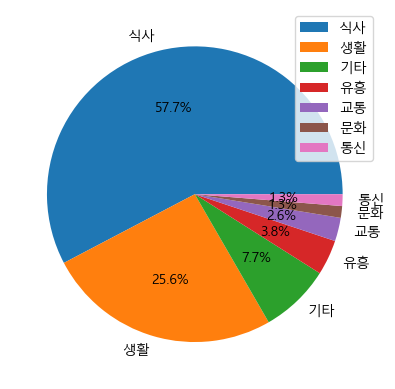

In [53]:
plt.pie(x=category, labels=category.index, autopct="%1.1f%%")
plt.legend()
plt.show()

<Axes: ylabel='count'>

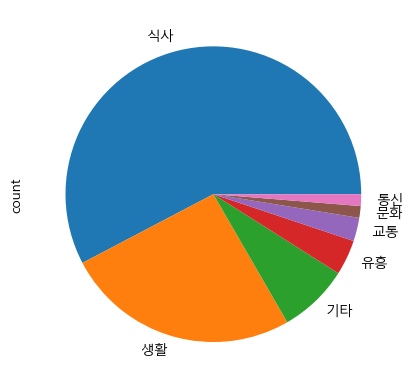

In [54]:
category.plot.pie(y=category)

In [55]:
# 요일별 바차트
weekday_list = ["월", "화", "수", "목", "금", "토", "일"]
card_day = card.groupby(["요일"])[["금액"]].sum().reindex(weekday_list)
# [] = 시리즈  [[]] = 데이터프레임
# reindex(weekday_list) 인덱스 다시 만들어줘 라는 뜻
card_day

,금액
요일,
월,104000
화,88830
수,156855
목,218100
금,169475
토,89640
일,8100


<BarContainer object of 7 artists>

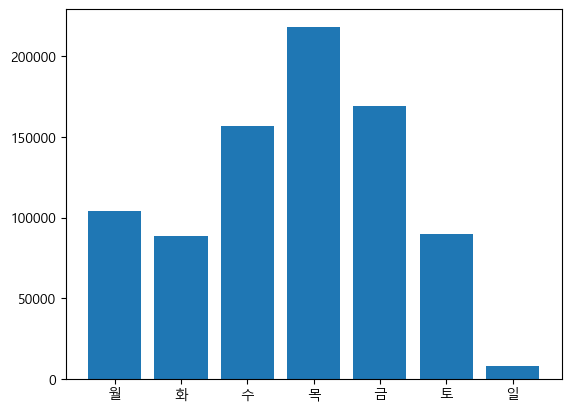

In [56]:
plt.bar(card_day.index, card_day["금액"])

In [58]:
import seaborn as sns

In [59]:
card_day2 = card.groupby(["요일"])[["금액"]].sum().reindex(weekday_list).reset_index()
card_day2

,요일,금액
0,월,104000
1,화,88830
2,수,156855
3,목,218100
4,금,169475
5,토,89640
6,일,8100


In [61]:
card_day2.columns=["day", "money"]

In [62]:
card_day2

,day,money
0,월,104000
1,화,88830
2,수,156855
3,목,218100
4,금,169475
5,토,89640
6,일,8100


<Axes: xlabel='day', ylabel='money'>

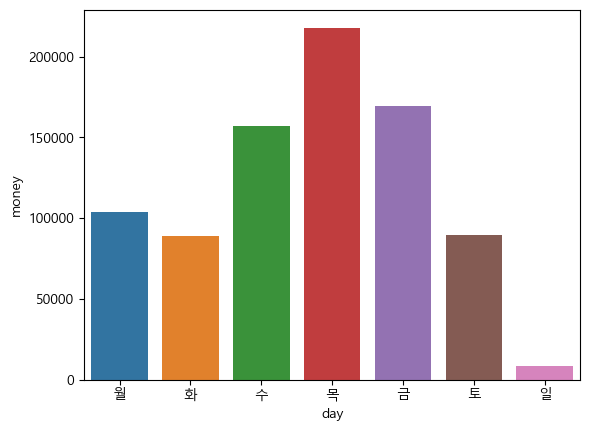

In [63]:
sns.barplot(data=card_day2, x="day", y="money")